# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/vehicles_us.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe()) 
print(len(df))
print(df.sample(10))


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
       price  model_year           model  condition  cylinders fuel  odometer  \
51520   9249      2013.0   nissan ma

In [2]:
# checking for missing values at random:

model_year_by_type = df.groupby('type').agg({'model_year': lambda x: x.isnull().sum()})

df_type = df.groupby('type').count()

model_year_missing_v = model_year_by_type / df_type

print(round(model_year_missing_v.dropna(axis=1)*100, 2).astype(str)+'%')

model_odometer_v = df.groupby('condition').agg({'odometer': lambda x: x.isnull().sum()})

df_condition = df.groupby('condition').count()

odometer_missing_v = model_odometer_v / df_condition 
                    
print(round(odometer_missing_v.dropna(axis=1) * 100, 2).astype(str)+'%')

df_paint_color = df.groupby('type').agg({'paint_color': lambda x: x.isnull().sum()})


            model_year
type                  
SUV               8.0%
bus               0.0%
convertible      6.44%
coupe            6.72%
hatchback        7.49%
mini-van          8.0%
offroad           4.9%
other             9.4%
pickup           7.77%
sedan             7.5%
truck            7.26%
van              6.57%
wagon            7.69%
          odometer
condition         
excellent   18.12%
fair         17.3%
good        18.13%
like new    18.14%
new          14.4%
salvage     17.35%


In order to check whether the data is missing at random or not I did calculate the percentage of missing value for model year from total model years values grouped by type and odometer missing values from the total odometer values grouped by condition, based on that calculation I can conclude that that the data is missing at random at this columns.

### Conclusion

After checking the data I found out that there is missing values at the 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd' columns that need to be treated but first of all I wanna get rid of all duplicates and work with up to date data.
I also assumed that there may be same ads that were placed more than once but with different dates and left only the latest ads that were published.

### Step 2. Data preprocessing

In [3]:

dup = df.duplicated().sum()

print(dup) # there is no duplicates

#I assumed that there may be same ads that were placed more than once but with different dates:

duplicate = df[df.duplicated(['price', 'odometer', 'model', 'model_year', 'paint_color', 'is_4wd', 'type', 'fuel', 'cylinders'])]

print((duplicate).sort_values(['price', 'odometer', 'model', 'model_year', 'paint_color', 'is_4wd', 'type', 'fuel', 'cylinders']))

#I left only the latest ads that were published:

df = df.sort_values('date_posted', ascending = False).drop_duplicates(['price', 'odometer', 'model', 'model_year', 'paint_color', 'is_4wd', 'type', 'fuel', 'cylinders'],keep = 'first')
                                                     
#dealing with missing values:

print(df[df['model_year'].isnull()].count())

df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))

print(df[df['cylinders'].isnull()].count())

df['cylinders'] = df.groupby(['model', 'model_year'])['cylinders'].fillna(method='ffill')

print(df[df['odometer'].isnull()].count())

df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))

print(df[df['paint_color'].isna()].count())

df['paint_color'] = df['paint_color'].fillna(value = 'Not reported')

print(df[df['is_4wd'].isnull()].count()) # There is only values = 1, so it's reasonable to assume that the missing values = 0

df['is_4wd'] = df['is_4wd'].fillna(value = 0) # Fill the missing values with 0

df['is_4wd'] = df['is_4wd'].astype(int) # Integer type more appropriate

df.info()

#there is still 256 'cylinders' missing values, it's less than 1% so I decided to get rid of them:

df = df.dropna()

df

0
        price  model_year            model  condition  cylinders    fuel  \
23602       1      2007.0  chevrolet tahoe   like new        8.0     gas   
23804       1      2007.0  chevrolet tahoe   like new        8.0     gas   
23811       1      2007.0  chevrolet tahoe   like new        8.0     gas   
23988       1      2007.0  chevrolet tahoe   like new        8.0     gas   
24989       1      2007.0  chevrolet tahoe   like new        8.0     gas   
...       ...         ...              ...        ...        ...     ...   
15788   59995      2019.0         ram 2500   like new        6.0  diesel   
1891    60774      2018.0  chevrolet tahoe  excellent        8.0     gas   
27375  189000      2014.0       ford f-150       good        6.0     gas   
33434  189000      2014.0       ford f-150       good        6.0     gas   
34389  189000      2014.0       ford f-150       good        6.0     gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
23602       1.

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14954,5990,2008.0,ford explorer,good,6.0,gas,141314.0,automatic,SUV,black,1,2019-04-19,56
19657,9800,2017.0,hyundai elantra,excellent,4.0,gas,61000.0,automatic,sedan,red,0,2019-04-19,18
26602,4995,1998.0,chevrolet camaro,good,6.0,gas,28170.0,automatic,convertible,Not reported,0,2019-04-19,66
12406,19900,2011.0,chevrolet silverado 1500,excellent,8.0,gas,68000.0,automatic,pickup,blue,1,2019-04-19,40
23157,15998,2007.0,jeep wrangler,excellent,6.0,gas,89000.0,automatic,SUV,black,1,2019-04-19,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,6500,2010.0,nissan maxima,good,6.0,gas,145941.0,automatic,sedan,black,0,2018-05-01,35
22271,2500,2009.0,ford focus,good,4.0,gas,154890.0,manual,sedan,blue,0,2018-05-01,39
45110,3850,2008.0,hyundai sonata,good,4.0,gas,158000.0,automatic,sedan,green,0,2018-05-01,20
36040,7900,2014.0,chevrolet cruze,good,4.0,gas,90212.5,automatic,sedan,custom,0,2018-05-01,33


After checking missing values at 'is_4wd' column 
Under the 'is_4wd' column there is only values = 1, so it's reasonable to assume that the missing values = 0, I think just because the intention of empty cell was that w4d is equal to zero.
Same logic I can assume for odometer missing values of the new cars. I will let know those who are responsible for data collection to fill the missing values with zeros in order to avoid this in future.I filled missing values with median value calculation by each missing value type, based on that median value is the more common value on the market. 

### Step 3. Make calculations and add them to the table

In [4]:

df['date_posted'] = pd.to_datetime(df['date_posted'])
df['day_of_the_week'] = df['date_posted'].dt.weekday
df['month'] = df['date_posted'].dt.month
df['year'] = df['date_posted'].dt.year
df["vehicle's_age"] = df['year'] - df['model_year']

for i in df['odometer']:
    if i > 0 :
        df['average_mileage'] = df['odometer'] / df["vehicle's_age"]
    else:
        df['average_mileage'] = 0
          
df['average_mileage'] = df['average_mileage'].round(decimals = 3)

print(df[(df['condition'] == 'new')&(df['odometer'] > 1000)]) #there is vehicles that uder new condition but they drived more then 1000 km 

df.loc[(df['condition'] == 'new')&(df['odometer'] > 1000),'condition']='like new'    

def numeric_scale(condition):
    if condition == 'new' :
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1  
    elif condition == 'salvage':
        return 0 
df['condition_numeric_scale'] = df['condition'].apply(numeric_scale)

df['condition_numeric_scale'] = df['condition_numeric_scale'].astype(int) # Integer type more appropriate


print(df.info())
print(df)



       price  model_year                       model condition  cylinders  \
25357  54000      2018.0                  ford f-250       new        8.0   
2170    8300      2013.0                toyota camry       new        4.0   
32544   4999      2011.0                chrysler 200       new        4.0   
47905  13900      2008.0               jeep wrangler       new        6.0   
27567  38000      2018.0                  ford f-150       new        6.0   
...      ...         ...                         ...       ...        ...   
26906  14995      2002.0          chevrolet corvette       new        8.0   
47747  14600      2013.0             ford expedition       new        8.0   
17672  58500      2018.0  chevrolet silverado 3500hd       new        8.0   
20539    250      2018.0                toyota camry       new        4.0   
13208      1      2018.0                 toyota rav4       new        4.0   

         fuel  odometer transmission   type paint_color  is_4wd date_posted

### Step 4. Carry out exploratory data analysis

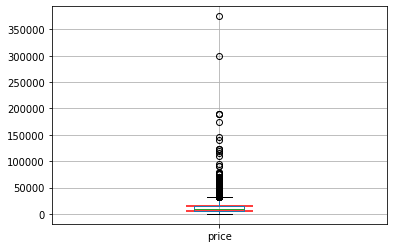

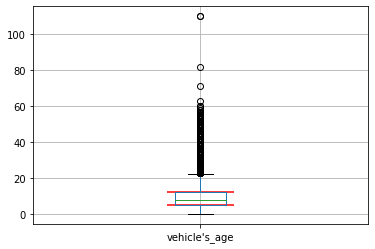

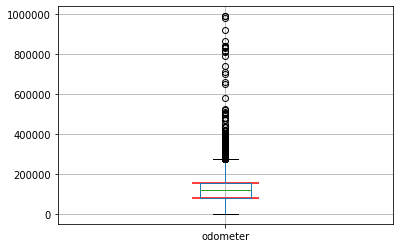

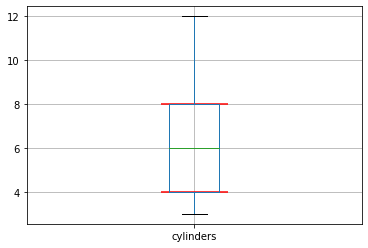

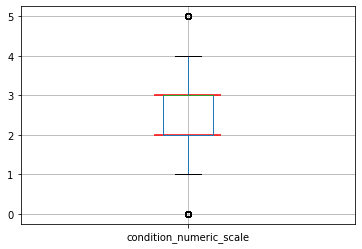

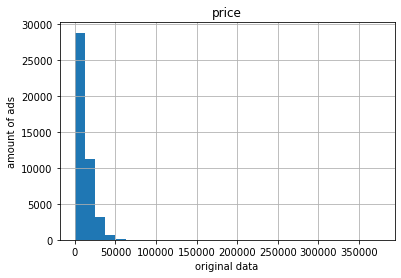

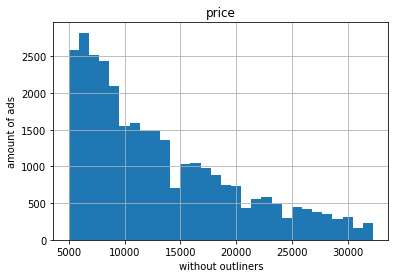

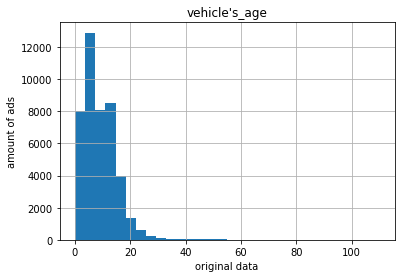

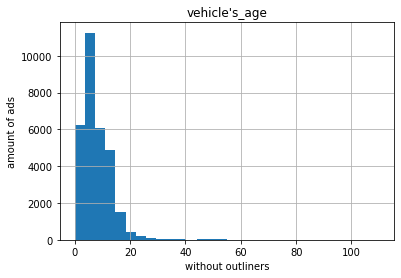

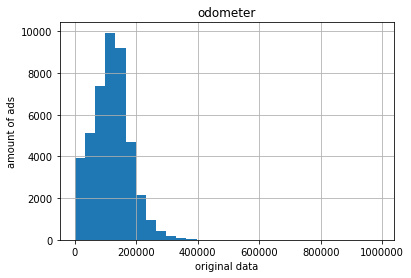

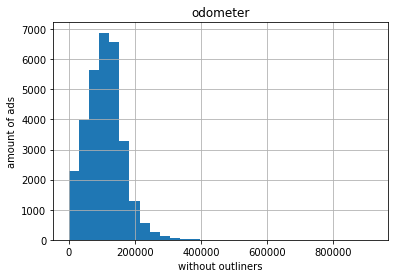

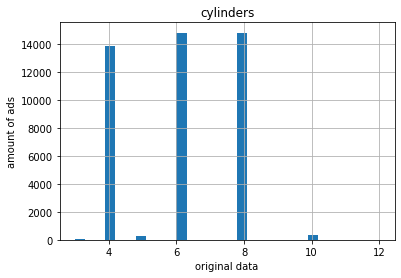

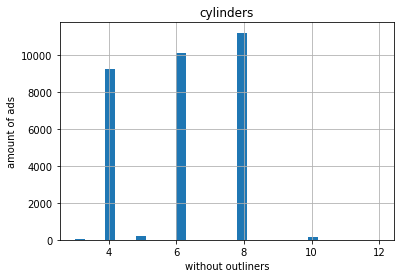

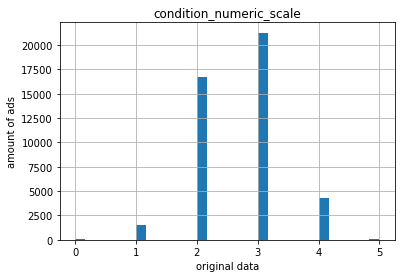

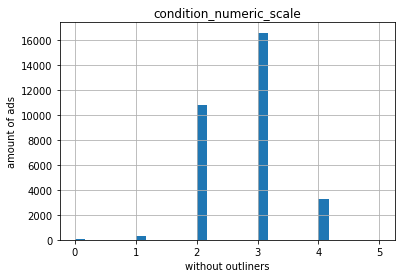

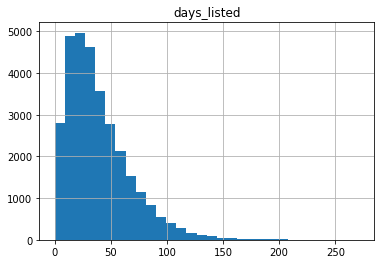

The median time advertisements were displayed for 33 days

The mean time advertisements were displayed for 39 days

Typical lifetime of an ad between 19 and 53 days

the correlation of "quick ads" price on days_listed ads :0.003
the correlation of "long ads" price on days_listed ads :-0.023
the correlation of "quick ads" vehicle's_age on days_listed ads :0.001
the correlation of "long ads" vehicle's_age on days_listed ads :-0.001
the correlation of "quick ads" odometer on days_listed ads :-0.012
the correlation of "long ads" odometer on days_listed ads :0.018
the correlation of "quick ads" cylinders on days_listed ads :0.008
the correlation of "long ads" cylinders on days_listed ads :-0.003
the correlation of "quick ads" condition_numeric_scale on days_listed ads :0.004
the correlation of "long ads" condition_numeric_scale on days_listed ads :-0.015


In [5]:
# Let's study the outliers:

import matplotlib.pyplot as plt

columns_name = ['price', "vehicle's_age", 'odometer', 'cylinders', 'condition_numeric_scale']

for name in columns_name:
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    df.boxplot(column = name)
    plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red') 
    plt.show()

# In order determine which factors influence the price of a vehicle I need to ges rid of outliers:

for name in columns_name:
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1
    if name == 'price':
        df_out = df[(df[name] > Q1) & (df[name] < Q3 + 1.5 * IQR)] # there is a sharp spike around 0 price which make no sense
        if name == "vehicle's_age":
            df_out = df[df[name] < Q3 + 1.5 * IQR] # it's legitimate that there are also new cars for sale  
            if name == 'odometer':
                df_out = df[df[name] < Q3 + 1.5 * IQR] # new cars usually has 0 mileage
                if name == 'cylinders':
                    df_out = df[(df[name] > Q1 - IQR * 1.5) & (df['cylinders'] < Q3 + 1.5 * IQR)]
                    if name == 'condition_numeric_scale':
                        df_out = df[(df[name] > Q1 - IQR * 1.5) & (df['condition_numeric_scale'] < Q3 + 1.5 * IQR)]     

# Comparing original data with without outliers data:

import matplotlib.pyplot as plt
bins = 30
for name in columns_name:
    df.hist(column = name, bins = bins);
    plt.xlabel('original data')
    plt.ylabel('amount of ads');
    df_out.hist(column = name, bins = bins);
    plt.xlabel('without outliners')
    plt.ylabel('amount of ads');
    plt.show()

df_out.hist(column = 'days_listed', bins = 30)
plt.show()
    
median_ad = df_out['days_listed'].median() 

mean_ad = df_out['days_listed'].mean()

print('The median time advertisements were displayed for {:.0f}'.format(median_ad), 'days')
print()
print('The mean time advertisements were displayed for {:.0f}'.format(mean_ad), 'days')
print()

Q1 = df['days_listed'].quantile(0.25)
Q3 = df['days_listed'].quantile(0.75)

print('Typical lifetime of an ad between {:.0f}'.format(Q1), 'and {:.0f}'.format(Q3), 'days') # I took a IQR as typical life time of an ad

quickly_ads = df_out[df_out['days_listed'] < Q1] # all the ads that removed quickly 

long_ads = df_out[df_out['days_listed'] > Q3] # all the ads that listed for abnormally long time
print()



for name in columns_name:
    print('the correlation of "quick ads"',name,'on days_listed ads :{:.3f}'.format(quickly_ads[name].corr(quickly_ads['days_listed'])))          
    print('the correlation of "long ads"',name,'on days_listed ads :{:.3f}'.format(long_ads[name].corr(long_ads['days_listed'])))          
# There is no dependency between the quantitative columns in columns_name and days_listed.
                         

After checking the variables distributions I pay attention to that there is a sharp spike around 0 on the graf price which make no sense, in order to know wich factor influence the price of vehicles
I determined the typical price based on IQR method, based on that method I got rid from other outliers as well, for example vehicle's age which is really old and much above the typical market age does not reflect the influence of the age on average market price and needs to be excluded. The outliers affect the average and don't let to see the real common of things, after I got rid of them you can see the effect on the graphs which is show more realistic influence of price factors.

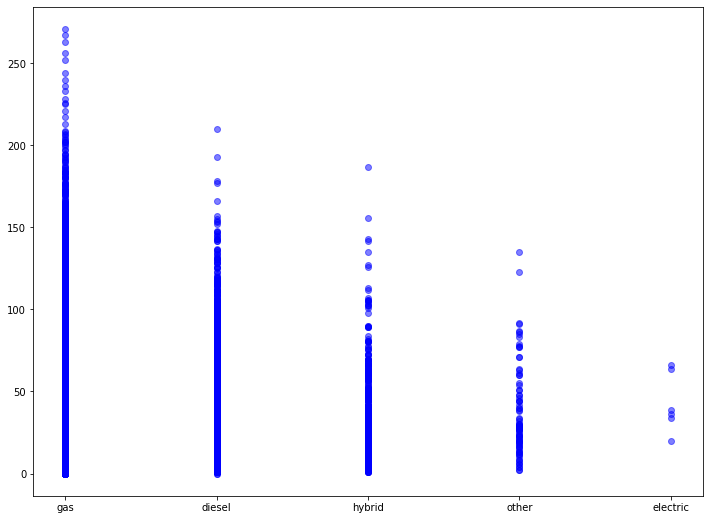

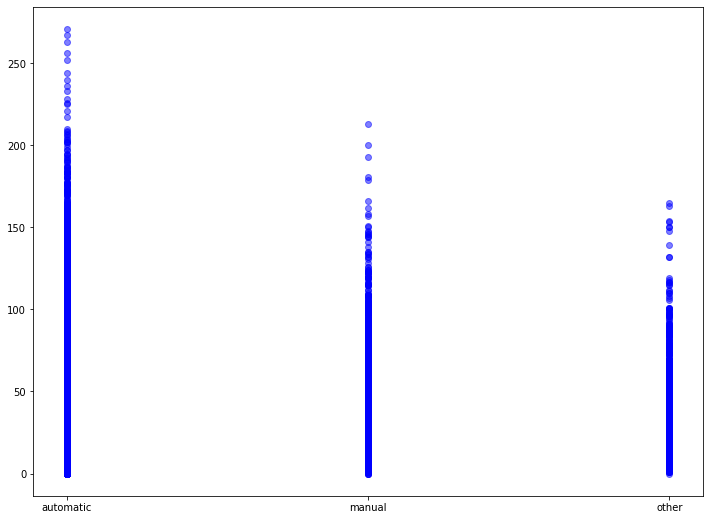

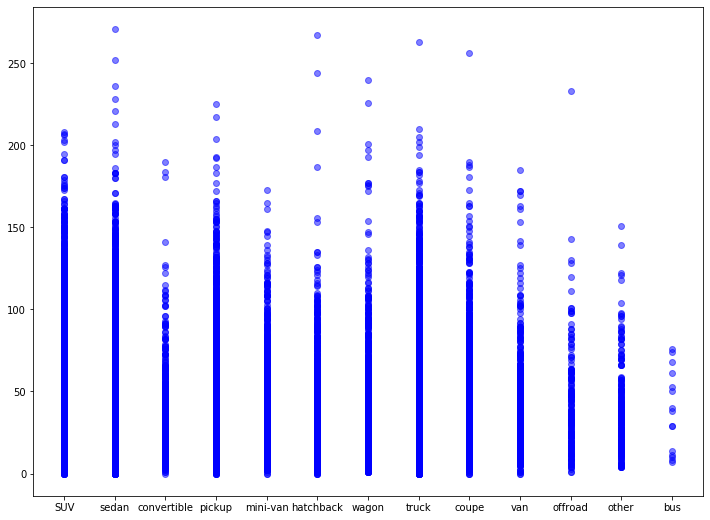

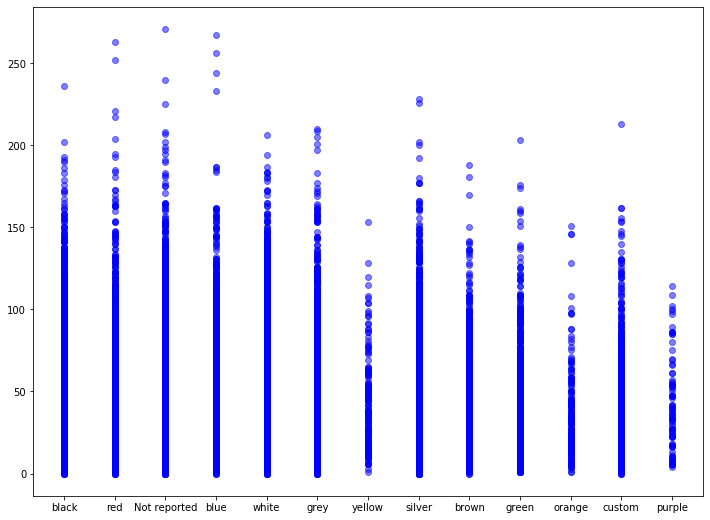

             price
type              
bus             11
offroad        154
other          180
convertible    312
van            343
hatchback      583
mini-van       667
wagon          783
coupe         1220
pickup        4512
sedan         6599
SUV           7780
truck         7856


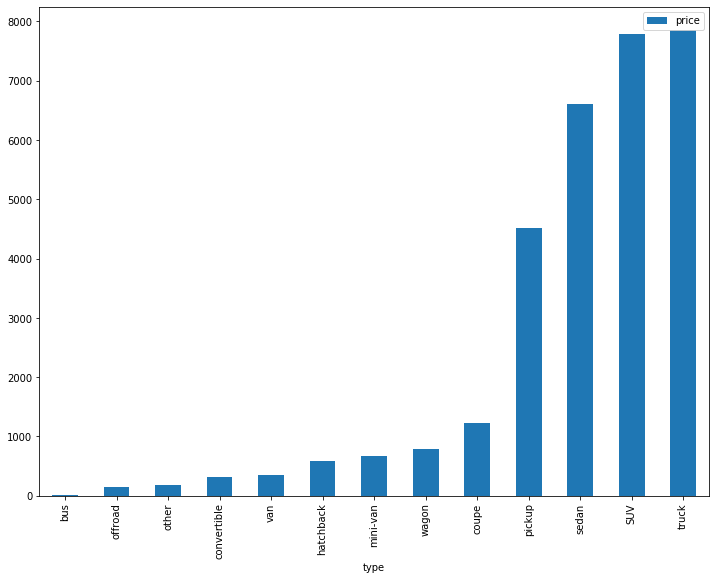

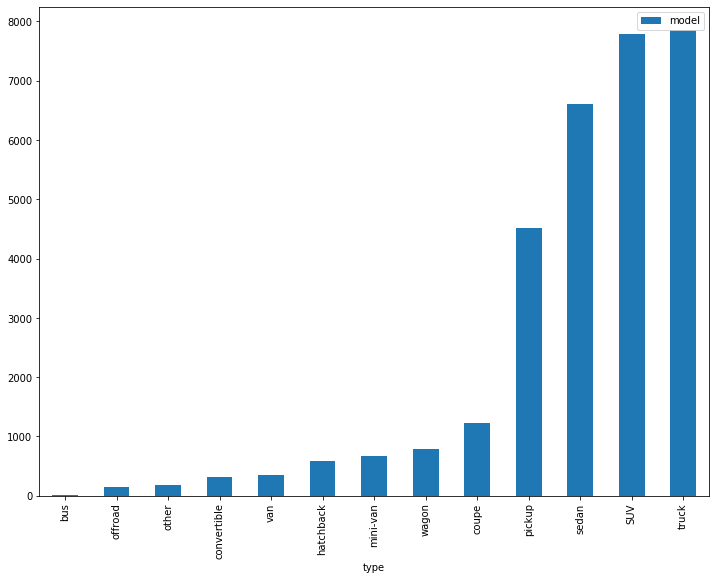

In [6]:
# I will plot scatter for the categorical columns and lets see:

cat_columns =['fuel', 'transmission', 'type', 'paint_color']

for name in cat_columns:
    plt.scatter(df[name].values, df['days_listed'], color="blue", alpha=0.5)
    plt.gcf().set_size_inches((12, 9))  
    plt.show()   
      
# everything becomes very clear as we look at the graphs for example the shortest ads have bus type

# and as more rare the color of a car then shorter the time of an ad (orange and purple for example)

#In order to nalyze the number of ads and the average price for each type of vehicle:

ads_by_type = df_out.pivot_table(index ='type', values = 'price', aggfunc = 'count').sort_values('price')

ads_by_type.plot(kind = 'bar', figsize=(12, 9))

print(ads_by_type)

num_of_ads_by_type = df_out.pivot_table(index ='type', values = 'model', aggfunc = 'count').sort_values('model')

num_of_ads_by_type.plot(kind = 'bar', figsize=(12, 9))

# two types with the greatest number of ads are truck and SUV and apparently are most expensive.


SUV price depends:
                            price  vehicle's_age  odometer  \
price                    1.000000      -0.516029 -0.551306   
vehicle's_age           -0.516029       1.000000  0.515642   
odometer                -0.551306       0.515642  1.000000   
condition_numeric_scale  0.222317      -0.172539 -0.222340   

                         condition_numeric_scale  
price                                   0.222317  
vehicle's_age                          -0.172539  
odometer                               -0.222340  
condition_numeric_scale                 1.000000  

truck price depends:

                            price  vehicle's_age  odometer  \
price                    1.000000      -0.629646 -0.499255   
vehicle's_age           -0.629646       1.000000  0.474617   
odometer                -0.499255       0.474617  1.000000   
condition_numeric_scale  0.281689      -0.232696 -0.241939   

                         condition_numeric_scale  
price                         

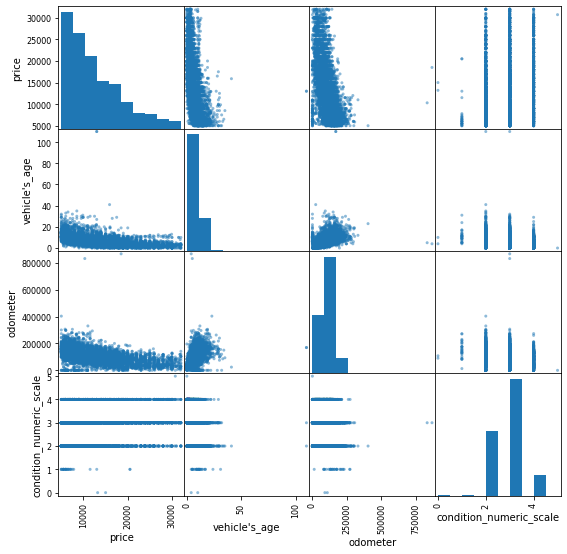

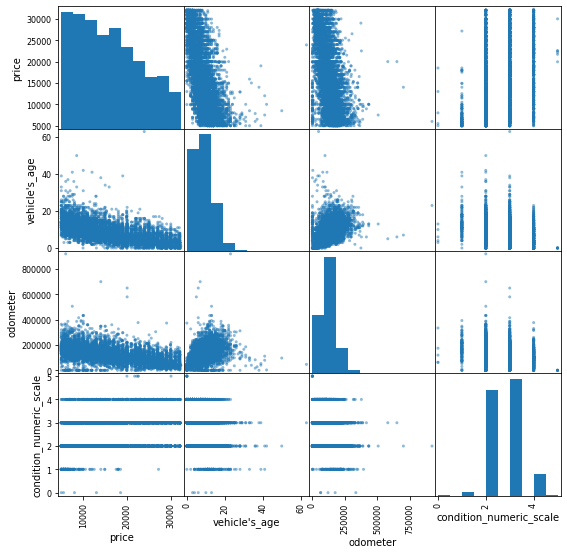

In [7]:

print('SUV price depends:')

df_SUV = df_out[(df_out['type'] == 'SUV')] 

price_SUV_corr = df_SUV[['price', "vehicle's_age", 'odometer', 'condition_numeric_scale']]

pd.plotting.scatter_matrix(price_SUV_corr, figsize=(9, 9))

print(price_SUV_corr.corr())

print()

print('truck price depends:')

print()

df_truck = df_out[(df_out['type'] == 'truck')] 

price_truck_corr = df_truck[['price', "vehicle's_age", 'odometer', 'condition_numeric_scale']]

pd.plotting.scatter_matrix(price_truck_corr, figsize=(9, 9))

print(price_truck_corr.corr())


              price  model_year  model  condition  cylinders  fuel  odometer  \
transmission                                                                   
other            56          56     56         56         56    56        56   
manual          353         353    353        353        353   353       353   
automatic      7371        7371   7371       7371       7371  7371      7371   

              type  paint_color  is_4wd  date_posted  days_listed  \
transmission                                                        
other           56           56      56           56           56   
manual         353          353     353          353          353   
automatic     7371         7371    7371         7371         7371   

              day_of_the_week  month  year  vehicle's_age  average_mileage  \
transmission                                                                 
other                      56     56    56             56               56   
manual             

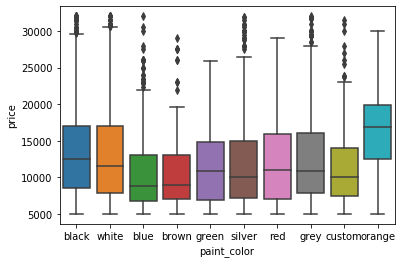

In [8]:
import seaborn as sns

# In order to filter categorical variables that have at least 50 ads I sorted them in ascending order 

print(df_SUV.groupby('transmission').count().sort_values('paint_color')) 

print(df_SUV.groupby('paint_color').count().sort_values('transmission')) # In need to exclude Not reported, purple and yellow colors

Not = pd.Series(['purple', 'yellow','Not reported'])
                
df_SUV = df_SUV.loc[~df_SUV['paint_color'].isin(Not)]
print()
print(df_SUV['paint_color'].value_counts())

sns.boxplot( x = df_SUV['paint_color'], y = df_SUV['price'])


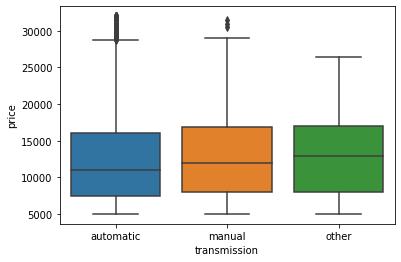

In [9]:
sns.boxplot(x = df_SUV['transmission'], y = df_SUV['price'])

              price  model_year  model  condition  cylinders  fuel  odometer  \
paint_color                                                                    
purple            8           8      8          8          8     8         8   
orange           21          21     21         21         21    21        21   
yellow           27          27     27         27         27    27        27   
green           144         144    144        144        144   144       144   
brown           167         167    167        167        167   167       167   
custom          179         179    179        179        179   179       179   
blue            593         593    593        593        593   593       593   
grey            607         607    607        607        607   607       607   
silver          692         692    692        692        692   692       692   
red             698         698    698        698        698   698       698   
black           984         984    984  

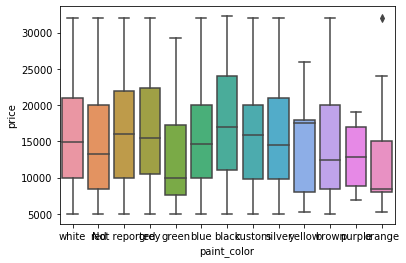

In [10]:

# In order to filter categorical variables that have at least 50 ads I sorted them in ascending order 

print(df_truck.groupby('paint_color').count().sort_values('transmission')) # In need to exclude Not reported, purple, orange, yellow colors

Not = pd.Series(['purple', 'yellow', 'orange','Not reported'])
                
df_track = df_truck.loc[~df_truck['paint_color'].isin(Not)]
print()
print(df_truck['paint_color'].value_counts())

sns.boxplot( x = df_truck['paint_color'], y = df_truck['price'])


              price  model_year  model  condition  cylinders  fuel  odometer  \
transmission                                                                   
other            51          51     51         51         51    51        51   
manual          266         266    266        266        266   266       266   
automatic      7539        7539   7539       7539       7539  7539      7539   

              type  paint_color  is_4wd  date_posted  days_listed  \
transmission                                                        
other           51           51      51           51           51   
manual         266          266     266          266          266   
automatic     7539         7539    7539         7539         7539   

              day_of_the_week  month  year  vehicle's_age  average_mileage  \
transmission                                                                 
other                      51     51    51             51               51   
manual             

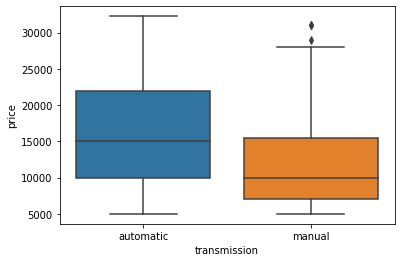

In [11]:
print(df_truck.groupby('transmission').count().sort_values('paint_color')) 

# There is less then 50 ads for 'other' under 'transmission' column for track category so I need to ged rid of them:

df_truck = df_truck.loc[df_truck['transmission'] != 'other']

sns.boxplot( x = df_truck['transmission'], y = df_truck['price'])



### Step 5. Overall conclusion

My first conclusion is that vehicle's type popularity affect its price, more popular car, is more expensive. After detecting two most popular cars: truck and SUV, I found out that color factor has impact on price, it's seems that purple color is the most "expensive" one but after deeper examination its tern out that purple is an outlier and different color has more effect for different type, for SUV it's an orange and for truck its black, the orange color can be explaine by its rarity and if we exclude it, there is black "expensive" color for SUV too and also wite, which are two most popular and expensive colors.
The automatic transmission has much more impact on truck price then on SUV's price. SUV's manual transmission has just slightly more effect on it's price than automatic. Two more factors, vehicle's_age and odometer has logical and obvious effect: the more new the vehicle and has less mileage the more expensive it is, when truck's age has more effect on price than SUV's.
The condition scale surprisingly has much less effect than was expected by me, I can explain it by how reliable is "excellent" condition is, or by how hard to tell what dose "like new" really mean. The main conclusion is that different vehicle types has different price factor impact, but one factor in common is popularity the more the factor is popular the price is more expensive. Thank you for reading!

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn

<div style="border:solid black 2px; padding: 20px">
<h3>Checklist</h3> 
    
Let's make your project truly awesome and work a little bit more on the following issues:

1. **Move the text from code cells to markdown cells.**
2. **Add some conclusions to step 2.**
3. **Think about the way to calculate average_mileage one more time.**
4. **Comment variables distributions in step 4.**
5. **Fix the code.**

Looking forward to seeing your perfect project next time! Be free to ask whatever questions you have. Good luck 🙂
</div>

-  I did add print(df.sample(10)) in order to check if there is missing data at random. 
-  Under the 'is_4wd' column there is only values = 1, so it's reasonable to assume that the missing    values = 0, I think just because the intention of empty cell was that w4d is equal to zero.
-  I added some logic explonation to step 1 conclusion
-  I did change the an average mileage calculation and I assume that a new car has an average mileage equal to odometer value for obvious reason ;)
- the bag code was fixed.
- Thank you for your review, I need to get to the next project other way I am out 

<div style="border:solid black 2px; padding: 20px">
<h3>Checklist v2</h3> 
    
Let's work a bit more oh the project:

1. **Add some conclusions to step 2.** We should check whether the data is missing at random or not, think of some reasons for missing data, and explain the logic behind choosing some particular method of value imputation.
2. **Comment variables distributions in step 4.**
3. **Fix the code.**

Looking forward to seeing your project! Don't be nervous and feel free to ask questions. Good luck 🙂
</div>

- The conclusions to step 2 were added in additional cell
- The Comment were added
- I fixed the cod 

- Polina its just my second project and I have no coding back ground so p 